In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('heart.csv')
print(data.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
le_sex = LabelEncoder()
le_chestpaintype = LabelEncoder()
le_restingecg = LabelEncoder()
le_exerciseangina = LabelEncoder()
le_stslope = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
data['ChestPainType'] = le_chestpaintype .fit_transform(data['ChestPainType'])
data['RestingECG'] = le_restingecg.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = le_exerciseangina.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = le_stslope.fit_transform(data['ST_Slope'])

In [7]:
import joblib
joblib.dump(le_sex, 'le_sex.pkl')
joblib.dump(le_chestpaintype, 'le_chestpaintype.pkl')
joblib.dump(le_restingecg, 'le_restingecg.pkl')
joblib.dump(le_exerciseangina, 'le_exerciseangina.pkl')
joblib.dump(le_stslope, 'le_stslope.pkl')

['le_stslope.pkl']

In [8]:
import pycaret.classification as pyc
exp1 = pyc.setup(data, target='HeartDisease')

,Description,Value
0,Session id,6155
1,Target,HeartDisease
2,Target type,Binary
3,Original data shape,"(918, 12)"
4,Transformed data shape,"(918, 12)"
5,Transformed train set shape,"(642, 12)"
6,Transformed test set shape,"(276, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [9]:
best_model = pyc.compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8691,0.9236,0.9097,0.8635,0.8852,0.7328,0.7361,0.1420
rf,Random Forest Classifier,0.8645,0.9220,0.9014,0.8618,0.8807,0.7238,0.7259,0.1640
gbc,Gradient Boosting Classifier,0.8598,0.9212,0.8843,0.8668,0.8748,0.7152,0.7168,0.1500
lr,Logistic Regression,0.8582,0.9106,0.8817,0.8648,0.8728,0.7125,0.7134,0.5520
nb,Naive Bayes,0.8582,0.9098,0.8708,0.8743,0.8716,0.7133,0.7151,0.0160
ridge,Ridge Classifier,0.8567,0.0000,0.8648,0.8752,0.8695,0.7103,0.7113,0.0180
lda,Linear Discriminant Analysis,0.8567,0.9128,0.8648,0.8752,0.8695,0.7103,0.7113,0.0230
ada,Ada Boost Classifier,0.8505,0.9041,0.8761,0.8594,0.8666,0.6961,0.6985,0.0690
lightgbm,Light Gradient Boosting Machine,0.8504,0.9235,0.8956,0.8457,0.8690,0.6945,0.6983,24.3120
qda,Quadratic Discriminant Analysis,0.8318,0.9111,0.8537,0.8450,0.8485,0.6592,0.6610,0.0240


In [10]:
final_model = pyc.create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8923,0.9071,0.8889,0.9143,0.9014,0.7828,0.7832
1,0.8462,0.9416,0.8611,0.8611,0.8611,0.6887,0.6887
2,0.8594,0.9127,0.8889,0.8649,0.8767,0.7131,0.7135
3,0.8750,0.9345,0.9444,0.8500,0.8947,0.7419,0.7482
4,0.8438,0.8849,0.9167,0.8250,0.8684,0.6774,0.6831
5,0.7812,0.8650,0.8286,0.7838,0.8056,0.5560,0.5571
6,0.8438,0.9350,0.8571,0.8571,0.8571,0.6847,0.6847
7,0.8750,0.9458,0.8571,0.9091,0.8824,0.7493,0.7507
8,0.8594,0.9064,0.8857,0.8611,0.8732,0.7154,0.7158


In [11]:
tuned_model = pyc.tune_model(final_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9191,0.9444,0.9189,0.9315,0.8438,0.8442
1,0.9077,0.9540,0.8889,0.9412,0.9143,0.8145,0.8160
2,0.8594,0.9325,0.8889,0.8649,0.8767,0.7131,0.7135
3,0.8281,0.9395,0.9444,0.7907,0.8608,0.6408,0.6582
4,0.7812,0.8591,0.8611,0.7750,0.8158,0.5484,0.5530
5,0.8281,0.8946,0.8571,0.8333,0.8451,0.6522,0.6525
6,0.8594,0.9419,0.9143,0.8421,0.8767,0.7137,0.7170
7,0.8906,0.9458,0.9143,0.8889,0.9014,0.7787,0.7790
8,0.8750,0.9108,0.8857,0.8857,0.8857,0.7478,0.7478


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [12]:
predictions = pyc.predict_model(tuned_model)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8587,0.9279,0.8824,0.8654,0.8738,0.7133,0.7135


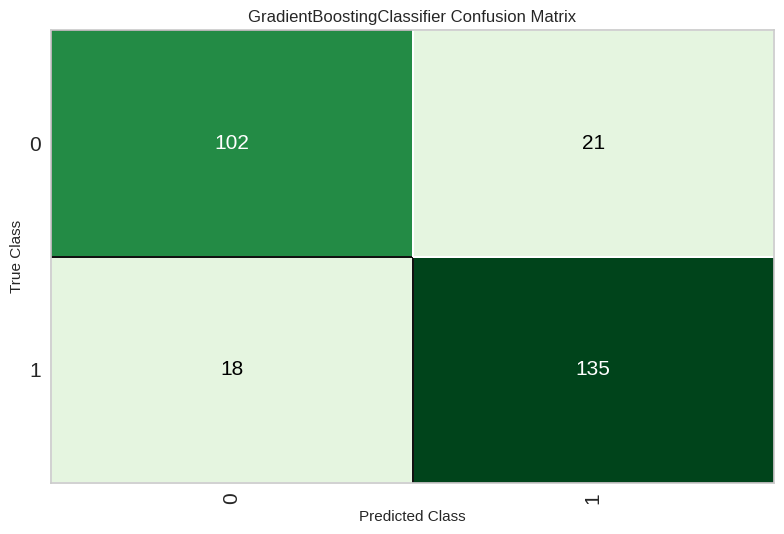

In [13]:
pyc.plot_model(tuned_model, plot='confusion_matrix')


In [14]:
pyc.save_model(tuned_model, 'modelo_final')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'Sex', 'ChestPainType',
                                              'RestingBP', 'Cholesterol',
                                              'FastingBS', 'RestingECG', 'MaxHR',
                                              'ExerciseAngina', 'Oldpeak',
                                              'ST_Slope'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,...
                                             criterion='friedman_mse', init=None,
       